In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

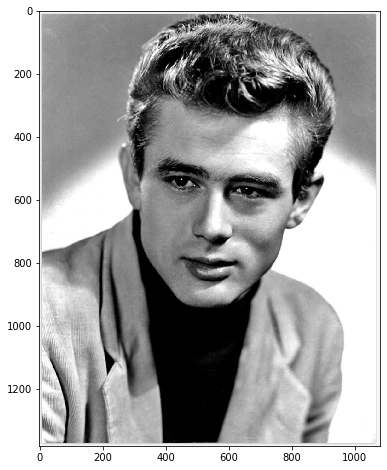

In [2]:
img = mpimg.imread('../data/face_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

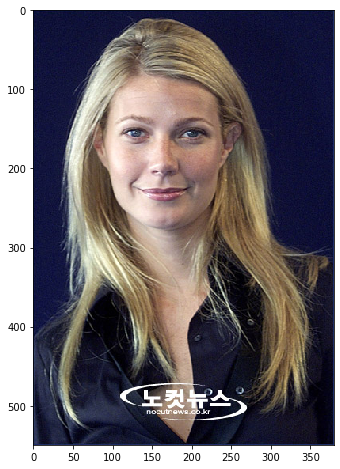

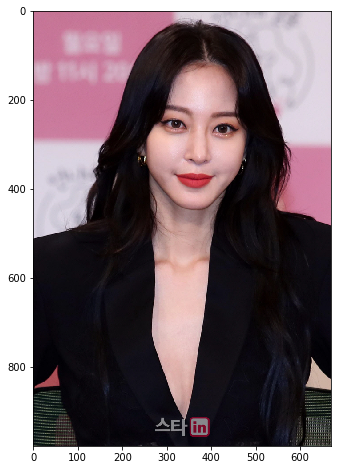

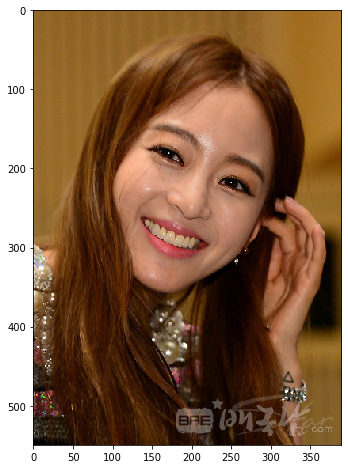

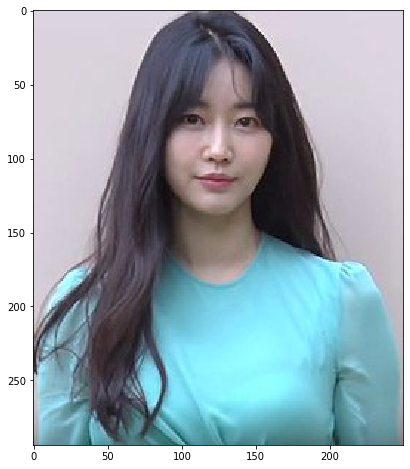

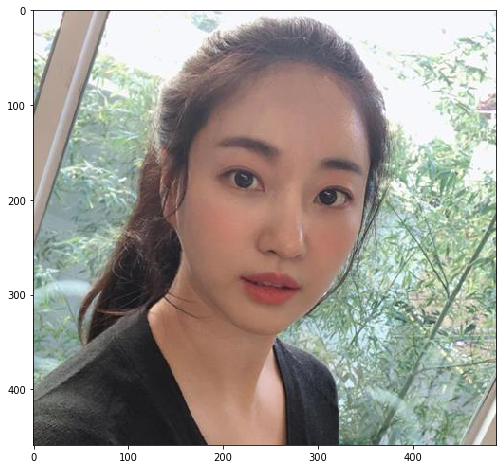

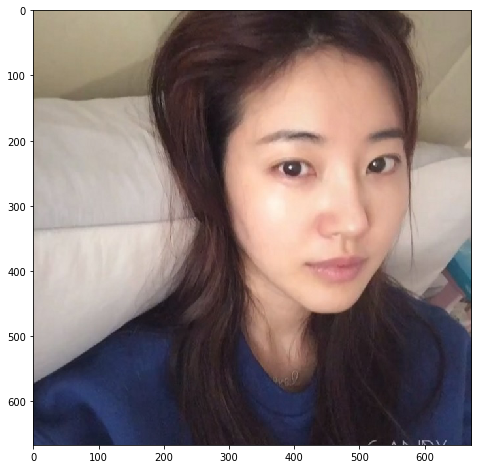

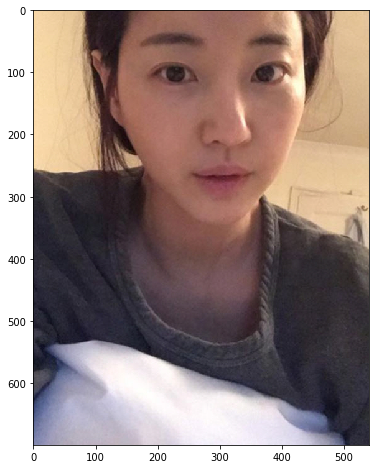

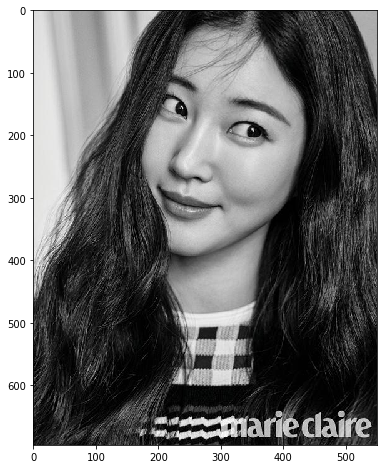

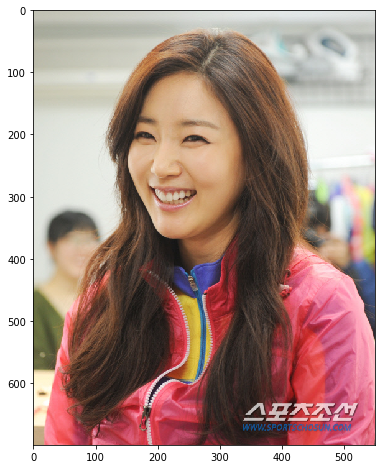

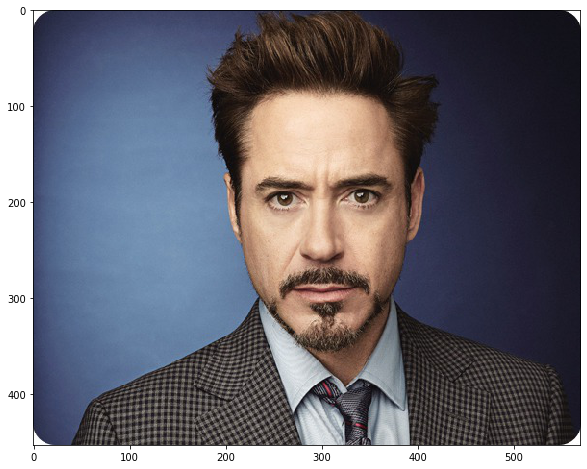

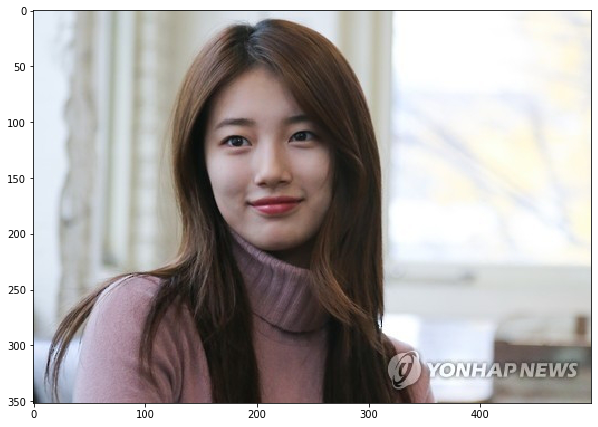

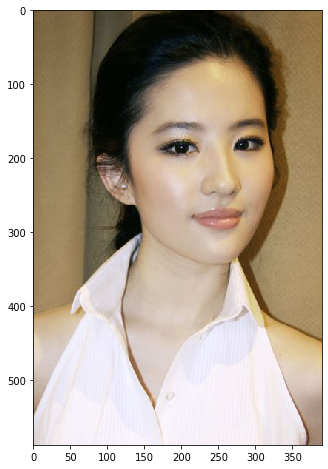

In [3]:
import glob
img_list=glob.glob('../data/face_re*')
def img_load(list):
    for image in list:
        img=mpimg.imread(image)
        plt.figure(figsize=(10,8))
        plt.imshow(img)
        plt.show()
img_load(img_list)    

In [4]:
import os
import sys
import requests
client_id = "lUmIlrku0w4BkbFTpl3X"
client_secret = "ONnaz_n54o"

url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('../data/face_recog_love2.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":489,"height":459},"faceCount":1},"faces":[{"celebrity":{"value":"이엘","confidence":0.170048}}]}


In [5]:
# json은  Java Script Object Notation의 약자로
# 웹서버와 클라이언트 간의 데이터 교환에 많이 사용
# json은 dict와 유사한 구조 -> API를 사용한 결과 json 데이터 형태로 출력
import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))
# 네이버 유명인 인식 api 적용 결과

{
    "info": {
        "size": {
            "width": 489,
            "height": 459
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이엘",
                "confidence": 0.170048
            }
        }
    ]
}


In [6]:
# 얼굴 감지 API
url = "https://openapi.naver.com/v1/vision/face" # 유명인 얼굴인식
files = {'image': open('../data/face_recog_love2.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False,
                 ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 489,
            "height": 459
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 162,
                "y": 125,
                "width": 206,
                "height": 206
            },
            "landmark": null,
            "gender": {
                "value": "female",
                "confidence": 0.99982
            },
            "age": {
                "value": "31~35",
                "confidence": 0.680877
            },
            "emotion": {
                "value": "neutral",
                "confidence": 0.982509
            },
            "pose": {
                "value": "right_face",
                "confidence": 0.693637
            }
        }
    ]
}


# 3.인식된 얼굴 사진에 정보를표시해 보자

In [22]:
url = "https://openapi.naver.com/v1/vision/face" #얼굴인식
files = {'image': open('../data/face_recog_han.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)

In [23]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [24]:
detect_result['faces']

[{'roi': {'x': 274, 'y': 209, 'width': 214, 'height': 214},
  'landmark': {'leftEye': {'x': 321, 'y': 251},
   'rightEye': {'x': 426, 'y': 262},
   'nose': {'x': 371, 'y': 324},
   'leftMouth': {'x': 318, 'y': 366},
   'rightMouth': {'x': 404, 'y': 370}},
  'gender': {'value': 'female', 'confidence': 0.999966},
  'age': {'value': '28~32', 'confidence': 1.0},
  'emotion': {'value': 'neutral', 'confidence': 0.999972},
  'pose': {'value': 'frontal_face', 'confidence': 0.999801}}]

In [25]:
# 각도의 위치(regioin of interest) -x,y 촤표, 높이, 넓이
detect_result['faces'][0]['roi']

{'x': 274, 'y': 209, 'width': 214, 'height': 214}

In [26]:
detect_result['faces'][0]['age']

{'value': '28~32', 'confidence': 1.0}

In [27]:
detect_result['faces'][0]['gender']

{'value': 'female', 'confidence': 0.999966}

In [28]:
x, y, w, h = detect_result['faces'][0]['roi'].values()

gender, gen_confidence = detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

In [ ]:
annotation = gender + ' : '+ str(gen_confidence) + \
             '\n'+ emotion + ' : ' + str(emotion_confidence) + \
             '\n'+ age + ' : '+str(age_confidence)
print(annotation)

# 바로 아래 코드로 얼굴을 분석 후 그 다음 코드를 적용해야 얼굴에 정확히 'roi'가 뜨게 된다.

In [39]:
url = "https://openapi.naver.com/v1/vision/face" #얼굴인식
files = {'image': open('../data/face_recog_yu.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)

x, y, w, h = detect_result['faces'][0]['roi'].values()

gender, gen_confidence = detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

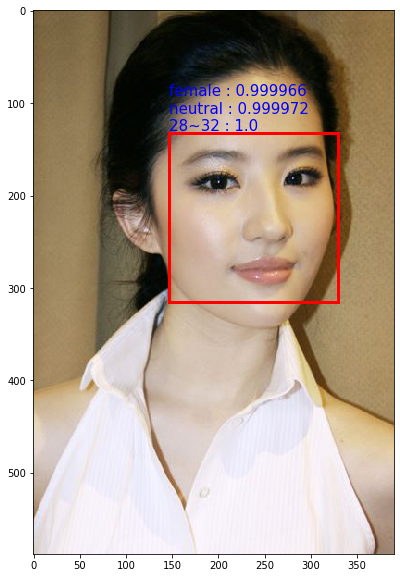

In [46]:
# patches : 사진에 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches
img = mpimg.imread('../data/face_recog_yu.jpg')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,      #(x,y) >>> 'roi' 위치
                               linewidth=3,
                             edgecolor='r',
                             facecolor='none')
ax.add_patch(rect_face)
plt.text(x, y-5, annotation, wrap=True,
        fontsize=15, color="blue")
plt.show()

# 다중 안면 인식

In [115]:
url = "https://openapi.naver.com/v1/vision/face" #얼굴인식
files = {'image': open('../data/face_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

detect_result = json.loads(response.text)

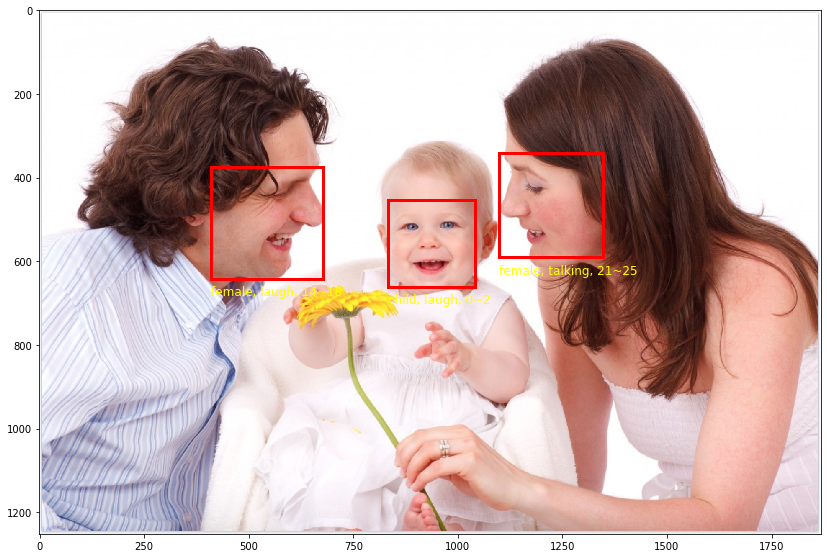

In [116]:
import matplotlib.patches as patches
img = mpimg.imread('../data/face_test_02.jpg')
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)
for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h,
                                   linewidth=3,
                                 edgecolor='r',
                                 facecolor='none')
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x, y+h+40,ant_letter, size=12, color='yellow')
    ax.add_patch(rect_face)
plt.show()